<a href="https://colab.research.google.com/github/girotodenis/ReconhecimentoImagemVisaoComputacional/blob/master/Projeto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOME COMPLETO DOS INTEGRANTES DO GRUPO:
**Davi Miranda Gonçalves**, 
**Denis SIlva Giroto**,
**Naiara Moura Pires**

MATRÍCULAS DOS INTEGRANTES DO GRUPO:
**1931143030**,
**1931143029**,
**1931143033**

In [1]:
!git clone -l -s https://github.com/girotodenis/ReconhecimentoImagemVisaoComputacional.git projeto
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
#%cd cloned-repo
!ls

Cloning into 'projeto'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 151 (delta 66), reused 32 (delta 4), pack-reused 0
Receiving objects: 100% (151/151), 54.92 MiB | 16.56 MiB/s, done.
Resolving deltas: 100% (66/66), done.
projeto  sample_data


In [ ]:


def record_video(filename='video.mp4'):
  js = Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      capture.textContent = "Start Recording";
      capture.style.background = "green";
      capture.style.color = "white";
      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);
      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);
      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();
      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();
      stream.getVideoTracks()[0].stop();
      div.remove();
      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
      return btoa(binaryString);
    }
    """)
  try:
    display(js)
    data = eval_js('recordVideo({})')
    binary = b64decode(data)
    with open(filename, "wb") as video_file:
      video_file.write(binary)
    print(
        f"Finished recording video. Saved binary under filename in current working directory: {filename}"
    )
  except Exception as err:
      # In case any exceptions arise
      print(str(err))
  return filename

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.9.13)
Cloning into 'cloned-repo'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 137 (delta 61), reused 27 (delta 3), pack-reused 0
Receiving objects: 100% (137/137), 49.71 MiB | 14.39 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [ ]:
from IPython.display import HTML
from base64 import b64encode
video_width = 300
video_path = record_video()
print(video_path)

<IPython.core.display.Javascript object>

Finished recording video. Saved binary under filename in current working directory: video.mp4
video.mp4


In [ ]:
# Run the function, get the video path as saved in your notebook, and play it back here.
#video_file = open(video_path, "r+b").read()
#video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
#HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

In [ ]:
import numpy as np
import cv2
import imutils
import os
from google.colab.patches import cv2_imshow


In [ ]:
!curl -OL http://alereimondo.no-ip.org/OpenCV/uploads/34/frontalFace10.zip
!unzip -o -q frontalFace10.zip
haarcascades = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  745k  100  745k    0     0   228k      0  0:00:03  0:00:03 --:--:--  228k


In [ ]:

def zoom_selecionado(img, kernel):
    plate_img = img.copy()
    plate_rects = haarcascades.detectMultiScale(plate_img, scaleFactor = 1.2, minNeighbors = 10) #maxSize = (100,100))
    for (x,y,w,h) in plate_rects:
        x_offset = x
        y_offset = y
        x_end = x+w
        y_end = y+h
        zoom_img = plate_img[y_offset:y_end, x_offset:x_end]
        #cv2_imshow(zoom_img)
        #zoom_img = cv2.resize(zoom_img, (0,0),fx = 2, fy = 2)
        
        #zoom_img = imutils.resize(zoom_img, width=200)

        #zoom_img = zoom_img[7:-7, 7:-7]
        #zoom_img = cv2.filter2D(zoom_img, -1, kernel)
       # zy = (200 - (y_end - y_offset))//2
        #zx = (200 - (x_end-x_offset))//2
        #ydim = (y_end+zy-0) - (y_offset-zy-0)
        #xdim = (x_end+zx) - (x_offset-zx)
        #zoom_img = cv2.resize(zoom_img,(xdim,ydim))
        #try:
            #cv2_imshow(zoom_img)
            #plate_img[y_offset-zy-0:y_end+zy-0, x_offset-zx:x_end+zx] = zoom_img
        #except:
        #    pass
        for (x,y,w,h) in plate_rects:
            cv2.rectangle(plate_img, (x,y), (x+w, y+h), (255,0,0), 2)
    return plate_img


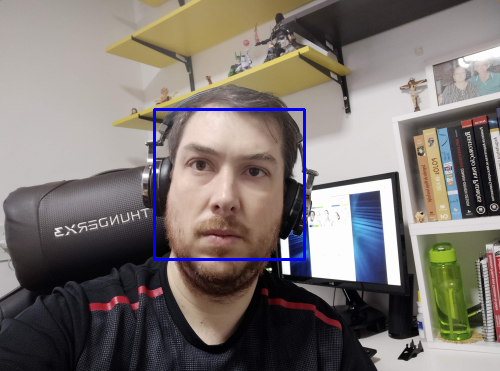

In [ ]:
frame = cv2.imread('img2.jpg')
frame = imutils.resize(frame, width=500)
frame = zoom_selecionado(frame, kernel)
cv2_imshow(frame)

In [ ]:
cap = cv2.VideoCapture('video.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
writer = cv2.VideoWriter('video2.mp4', cv2.VideoWriter_fourcc(*'DIVX'),20,(width, height))

kernel = np.array([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1]])

if cap.isOpened() == False:
    print('error file not found')

while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        frame = zoom_selecionado(frame, kernel)
        #cv2_imshow('frame', frame)
        writer.write(frame)
        if cv2.waitKey(10) & 0xff == ord('q'):
            break
    else:
        break
cap.release()
writer.release()

In [ ]:
video_file = open("video2.mp4", "rb").read()
video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

In [ ]:

from kora.drive import upload_public
url = upload_public('video2.mp4')
# then display it
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

person

bicycle

car

motorcycle

airplane

bus

train

truck

boat

traffic light

fire hydrant

stop sign

parking meter

bench

bird

cat

dog

horse

sheep

cow

elephant

bear

zebra

giraffe

backpack

umbrella

handbag

tie

suitcase

frisbee

skis

snowboard

sports ball

kite

baseball bat

baseball glove

skateboard

surfboard

tennis racket

bottle

wine glass

cup

fork

knife

spoon

bowl

banana

apple

sandwich

orange

broccoli

carrot

hot dog

pizza

donut

cake

chair

couch

potted plant

bed

dining table

toilet

tv

laptop

mouse

remote

keyboard

cell phone

microwave

oven

toaster

sink

refrigerator

book

clock

vase

scissors

teddy bear

hair drier

toothbrush

